In [1]:
import numpy as np 
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads (1).csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df['Gender'].replace(['Male','Female'] , [0,1],inplace=True)

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [8]:
df.drop(columns=['User ID'],inplace=True)

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

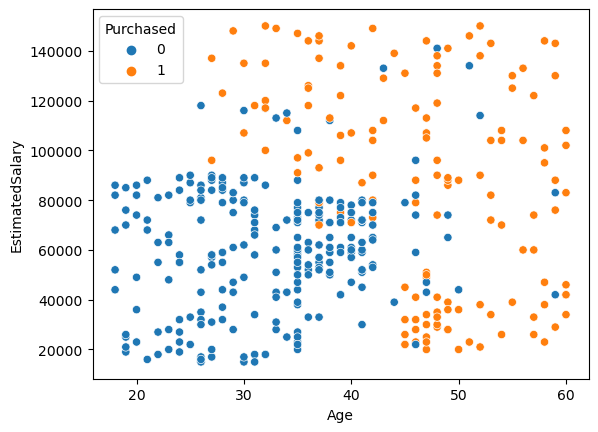

In [14]:
sns.scatterplot(x='Age' , y='EstimatedSalary' ,hue='Purchased',data=df)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

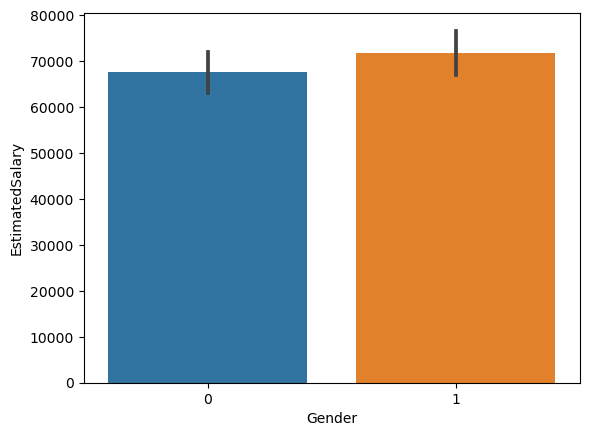

In [18]:
sns.barplot(x='Gender',y='EstimatedSalary',data=df)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

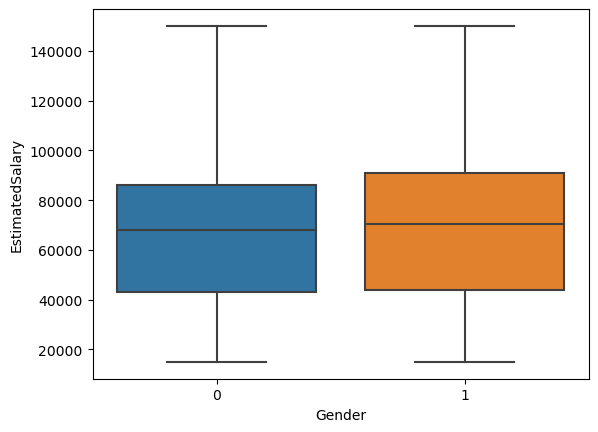

In [19]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=df)

In [31]:
X = df.iloc[:,0:3]
y = df.iloc[: , -1]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)

In [37]:
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train_scaled , y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score , recall_score , classification_report

In [43]:
accuracy_score(y_test , y_pred)

0.8875

In [44]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 7, 21]], dtype=int64)

In [47]:
precision_score(y_test , y_pred)

0.9130434782608695

In [48]:
recall_score(y_test,y_pred)

0.75

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [68]:
#predicting the Purchased status with individual value or we can add new values to the array
y_pred2=model.predict(X_test.values[0].reshape(1,3))
y_pred2

array([1], dtype=int64)